In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

import bayespy

__Data__

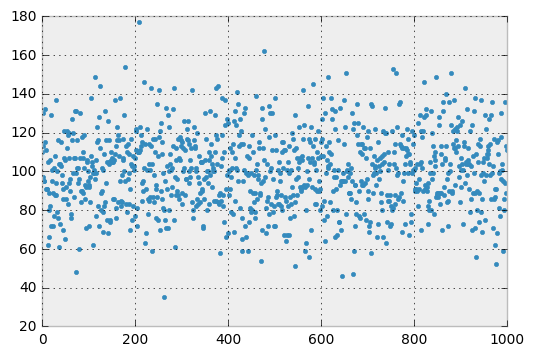

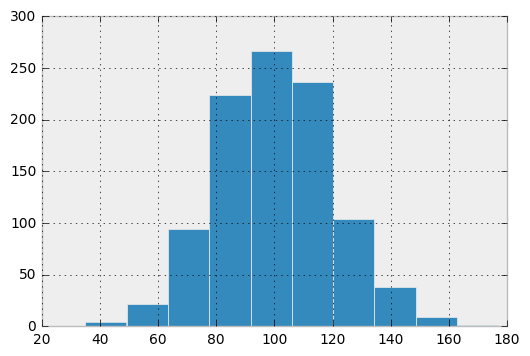

In [2]:
x = np.arange(1000)
y = np.round(np.random.normal(loc=100, scale=20, size=len(x))).astype(int)
plt.plot(x,y,'.')
plt.figure()
_ = plt.hist(y)

In [3]:
mu = bayespy.nodes.GaussianARD(50, 1e-6)
tau = bayespy.nodes.Gamma(10, 1e-6)
Y = bayespy.nodes.GaussianARD(mu, tau, plates=(len(x),))

In [4]:
Y.observe(y)

In [5]:
Q = bayespy.inference.VB(mu, tau, Y)
Q.update(repeat=200)

Iteration 1: loglike=-4.623534e+03 (0.011 seconds)
Iteration 2: loglike=-4.612995e+03 (0.004 seconds)
Iteration 3: loglike=-4.612995e+03 (0.010 seconds)
Converged at iteration 3.


/usr/lib/python3.5/site-packages/bayespy/inference/vmp/nodes/gamma.py:170: RuntimeWarning: divide by zero encountered in log
  logx = np.log(x)
/usr/lib/python3.5/site-packages/bayespy/inference/vmp/nodes/expfamily.py:476: RuntimeWarning: invalid value encountered in add
  return (self.g + f + Z)


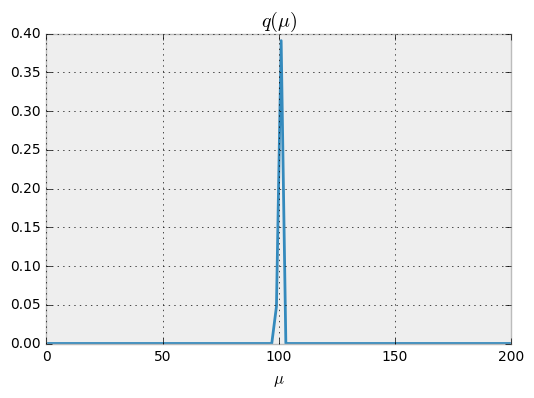

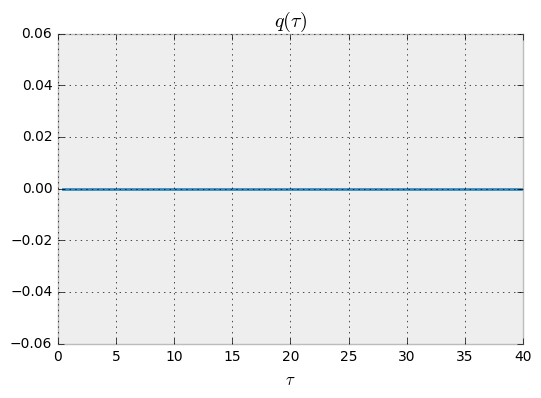

In [6]:
import bayespy.plot as bpplt
bpplt.pdf(mu, np.linspace(0, 200, num=100), name=r'\mu')
plt.figure()
bpplt.pdf(tau, np.linspace(0, 40, num=100), name=r'\tau')